In [13]:
# RNN

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import Tanh, Softmax, Linear, Relu, Sigmoid
from gympy.networks import RNN, DataSet
from gympy.optimizers import SGD, Adam
from gympy.loss import CategoricalCrossEntropy, MeanSquaredError

In [15]:
sin_wave = np.array([math.sin(0.5*x) for x in np.arange(200)])

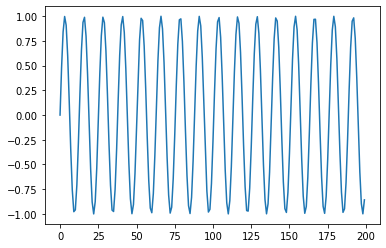

In [16]:
plt.plot(sin_wave)

(185, 1, 15)
(185, 1, 1)
185


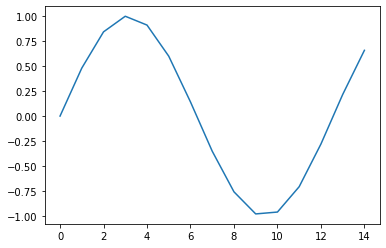

In [17]:
data = DataSet()
data.from_timeseries(sin_wave.reshape(1,-1),len_seq=15)
print(data.x.shape)
print(data.y.shape)
print(data.batch_size)
plt.plot(data.x[0,:,:].reshape(-1))

In [33]:
rnn = RNN(
    n_input=1, 
    n_hidden=10,
    n_output=1, 
    layer_hidden=Relu,
    layer_output=Linear, 
    loss=MeanSquaredError(), 
    optimizer=SGD(learning_rate=0.1),
    truncate=15
)

rnn.type


<RnnEnum.many_one: 'many_one'>

In [34]:
y,a =rnn.forward(data.x[0,:,:])
print(y.shape, a.shape)

(1, 15) (10, 15)


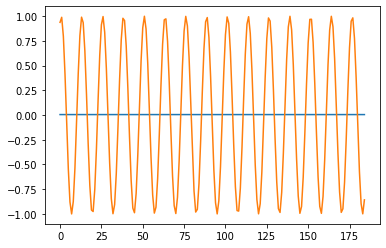

In [35]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))

In [36]:
data.x[0,:,:]

array([[ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
         0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
        -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ]])

In [37]:
rnn.get_loss(data.x[0,:,:],data.y[0,:,:])

[[0.00513106]] [[0.93799998]]


0.8702444125971678

0 cost 0.8702444125971678 iter 0
0 cost 0.4607525055176765 iter 150
0 cost 0.10244993269898911 iter 185
1 cost 0.012950961046514008 iter 300
1 cost 0.0037652665817849563 iter 370
2 cost 0.2113553216475666 iter 450
2 cost 0.0007087689595713722 iter 555


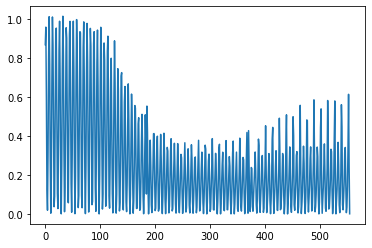

In [38]:
rnn.train_dataset(data,show=1, n_epochs=3)
plt.plot(rnn.cost)

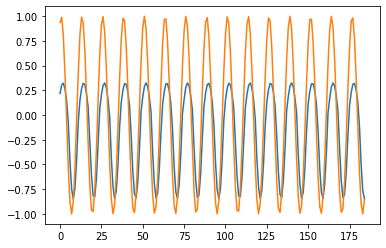

In [39]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))